# Project - 9 UnitedStates_COVID_19_dataset Project

About Project:-
    
Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe
disease. Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were such severe cases 
with the world already has faced. SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered
in 2019, which has not been identified in humans before. It is a contiguous virus which started from Wuhan in December 2019. 
Which later declared as Pandemic by WHO due to high rate spreads throughout the world. Currently (on the date 20 May 2020),
this leads to a total of 300K+ Deaths across the globe, including 90K+ deaths alone in USA.The dataset  is provided to identify
the deaths and recovered cases. Here in this project i will predict number of deaths by using regression technique.


About Dataset:-

In this dataset i have many features which will help me to predict the number of deaths. Here are the feature description:-
Field description
1.Province_State - The name of the State within the USA.
2.Country_Region - The name of the Country (US).
3.Last_Update - The most recent date the file was pushed.
4.Lat - Latitude.
6.55.Long_ - Longitude.
7.Confirmed - Aggregated confirmed case count for the state.
8.Deaths - Aggregated Death case count for the state.
9.Recovered - Aggregated Recovered case count for the state.
10.Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).
11.FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.
12.Incident_Rate - confirmed cases per 100,000 persons.
13.People_Tested - Total number of people who have been tested.
14.People_Hospitalized - Total number of people hospitalized.
15.Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.
16.UID - Unique Identifier for each row entry.
17.ISO3 - Officialy assigned country code identifiers.
18.Testing_Rate - Total number of people tested per 100,000 persons.
19.Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.


In [110]:
#Importing some libary to import the dataset
import pandas as pd

In [111]:
#Importing data into dataframe called df by using some library
df = pd.read_csv("csse_covid_19_daily_reports_us.csv")
df.head()#Checking the first 5 records from the dataset

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


# Exploratory Data Analysis

In [112]:
#Checking the shape of dataframe to know that how many rows and how many columns are in the dataframe df.
df.shape

(58, 18)

We can see that there 18 columns and 58 rows present in the dataset.

In [113]:
# This will print the names of all columns.
df.columns  

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [114]:
# This will give Index, Datatype and Memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

 From above result i  can observe that there are some columns in which there is missing values as non null should be 58
 but there are less non null values present in these columns.

In [115]:
#To show the total count of missing values present in each column in the dataset

df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

We can see that there is missing values present in columns Lat,Long_,Recovered,Incident_Rate,People_Tested,People_Hospitalized
Mortality_rate,Testing_Rate,Hospitalization_rate

In [116]:
#Checking datatypes of these columns
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [117]:
#Checking columns present in the dataset
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [118]:
#Treating and missing values by taking average of the column variable
cols =['Lat','Long_','Recovered','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Testing_Rate',
       'Hospitalization_Rate']
for i in cols:
    df[i].fillna(df[i].mean(), inplace=True)
    
df.isnull().sum()    
    

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [119]:
#This will give the random sample from dataset 
df.sample()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
16,Idaho,US,2020-05-21 02:32:54,44.2405,-114.4788,2506,77,1668.0,761.0,16,140.22993,38567.0,215.0,3.072626,84000016,USA,2158.119598,8.579409


In [120]:
#Droping the date column as it is already separted and used in the dataset
df.drop(['Last_Update'],axis=1,inplace=True)#Removing this column as there is one values across column which is no use
df.drop(['Country_Region'],axis=1,inplace=True)#Removing this column as there is one values across column which is no use
df.sample() #Checking sample records

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
3,Arizona,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005


In [121]:
#Converting object varible into numerical to see the corelation and finding better understanding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Province_State','ISO3']
for i in cols:
    df[i] = le.fit_transform(df[i])



In [122]:
#Checking sample again
df.sample()


,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
25,25,42.2302,-71.5301,88970,6066,7007.428571,82904.0,25,1290.822797,489953.0,8897.0,6.818029,84000025,4,7108.491647,10.0


In [123]:
#Checking the description of dataset for getting insights and statistical information
df.describe()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000
mean,28.500000,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3.844828,3894.186870,14.342541
std,16.886879,10.694329,48.873770,52562.031122,4084.750891,9901.304545,41294.705318,17408.350591,395.554852,2.934948e+05,9879.577790,2.116191,2.378302e+07,0.720665,1898.951207,3.781861
min,0.000000,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,0.000000,97.702058,6.778043
25%,14.250000,34.872800,-99.697700,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,8.400001e+07,4.000000,2741.843521,12.829963
50%,28.500000,38.978600,-86.797300,10148.500000,385.000000,4987.000000,5644.500000,32.500000,259.009335,1.433085e+05,4897.454545,4.409323,8.400003e+07,4.000000,3501.526835,14.342541
75%,42.750000,42.214075,-77.072550,29395.500000,1394.250000,7007.428571,19291.250000,47.750000,462.828082,2.646656e+05,4897.454545,5.450908,8.400004e+07,4.000000,4622.586404,15.552021
max,57.000000,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,5.000000,11377.424693,28.054438


Key Observation:-
    
1. While see count for every columns present in the dataset i found that there is 58 rows present in every columns which suggest
   that there is no missing value present in the dataset.
    
2. The standard deviation is very high in columns like Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Testing_
   Rate,Hospitalization_Rate. It concludes that range is very high and data is very spread.
    
3. There are many columns which mean is higher than median and also in some columns median is high than mean so it means there
   is skewness present in the dataset. and also there is left skewness and right skewness .
    
4. The is big difference in mean and max in across all columns and it suggest that there is high range and data is not normally
   distributed.
    
5. The difference between 75 percentile and maximum is high across all columns and it seems that there is large outliers 
   present in the dataset.
    
6. There are 58 rows and 20 columns present in the dataset.

In [124]:
#importing Some library to visualize the dataset and finding some observation
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

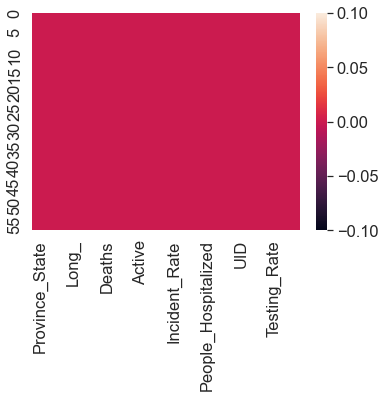

In [125]:
#Checking missing value using ploting heatmap
sns.heatmap(df.isnull())

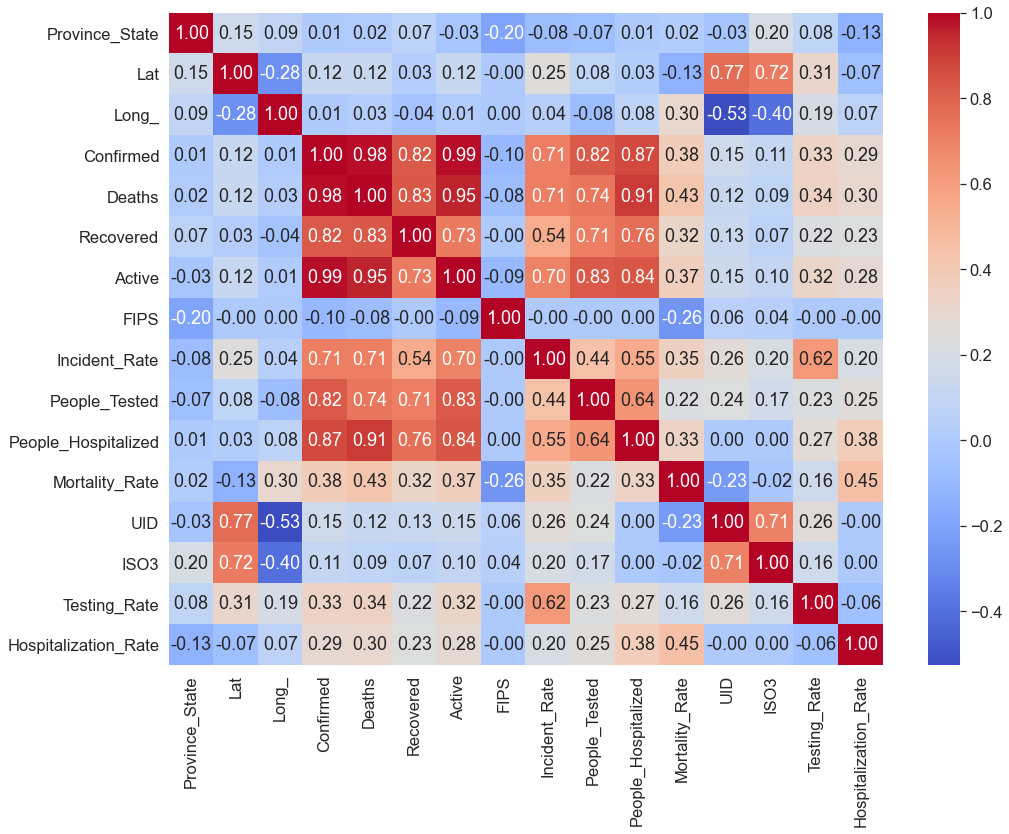

In [126]:
#Checking How data features are corelated with each other:-
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='.2f')

Observation:-
    
1. I am taking target column Deaths and will check good corelated columns and their impact on the target variable.

2. There is only single column -ve corelated with my target variable.

3. Rest all columns are very good corelated with the target variable and postively corelated with target.

4. The highest +ve corelated column = Confirmed

5. The highest -ve corelated column = FIPS(Only one column)

6. The columns People_hospitalized,Active and Confirmed are very high positive corelated columns with target varible.

Text(0.5, 1.0, 'Corelation With target variables')

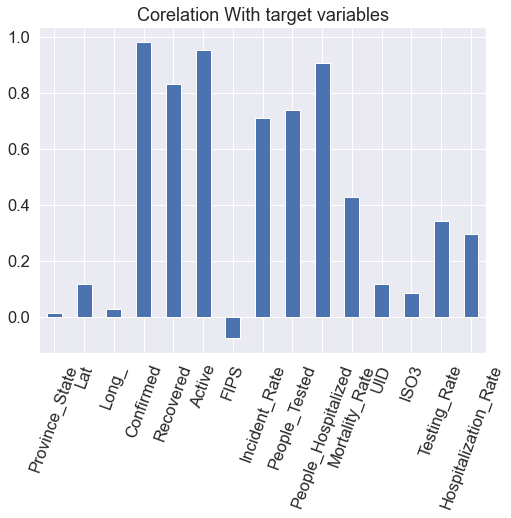

In [127]:
#The other way to check corelation and understand the relation with target column in better way
plt.figure(figsize=(8,6))
df.drop('Deaths',axis=1).corrwith(df['Deaths']).plot(kind='bar',grid=True)
plt.xticks(rotation=70)
plt.title('Corelation With target variables')

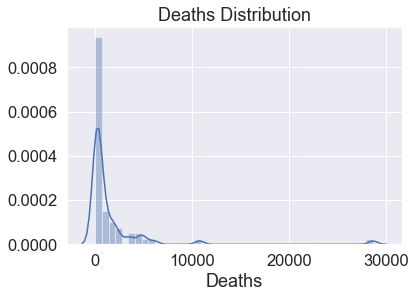

In [129]:
#Checking how my target variable distributed
sns.distplot(df['Deaths'])
plt.title("Deaths Distribution")
plt.show()

In [130]:
df1 = pd.read_csv("csse_covid_19_daily_reports_us.csv")#Creating dummy data for visualization purpose


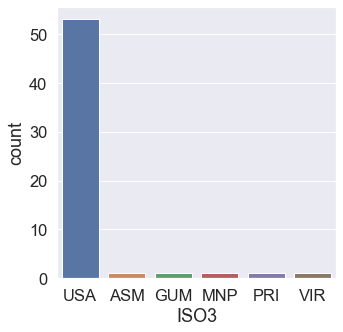

In [131]:
#Checking count of my target varibles
plt.figure(figsize=(5,5))
sns.countplot(df1['ISO3'])
plt.title("")

plt.show()

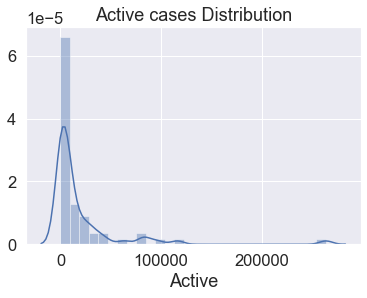

In [132]:
#Checking how Active column variable distributed
sns.distplot(df['Active'])
plt.title("Active cases Distribution")
plt.show()

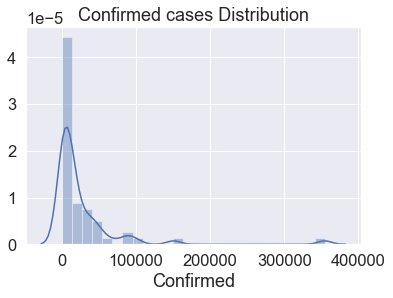

In [133]:
#Checking how Confirmed column variable distributed
sns.distplot(df['Confirmed'])
plt.title("Confirmed cases Distribution")
plt.show()

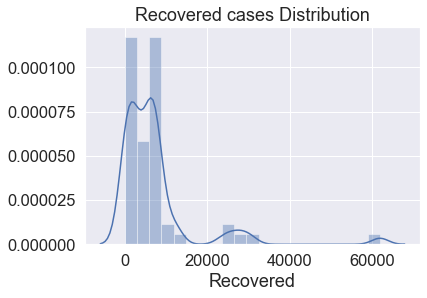

In [134]:
#Checking how Confirmed column variable distributed
sns.distplot(df['Recovered'])
plt.title("Recovered cases Distribution")
plt.show()

So here we can see that there is both good corelated columns Active and Confirmed are not normally distributed and there is 
skewness is present. Active cases count lies between 0 and 263848 and Confirmed cases lies between 0 and 354370.

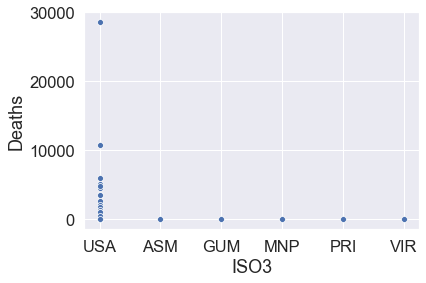

In [135]:
#Checking number Of deaths vs ISO3
sns.scatterplot(x="ISO3",y="Deaths",data=df1)

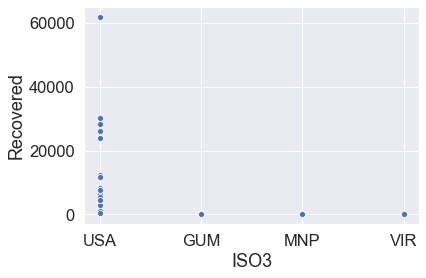

In [145]:
#Checking number Of Recovered vs ISO3
sns.scatterplot(x="ISO3",y="Recovered",data=df1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 <a list of 58 Text major ticklabel objects>)

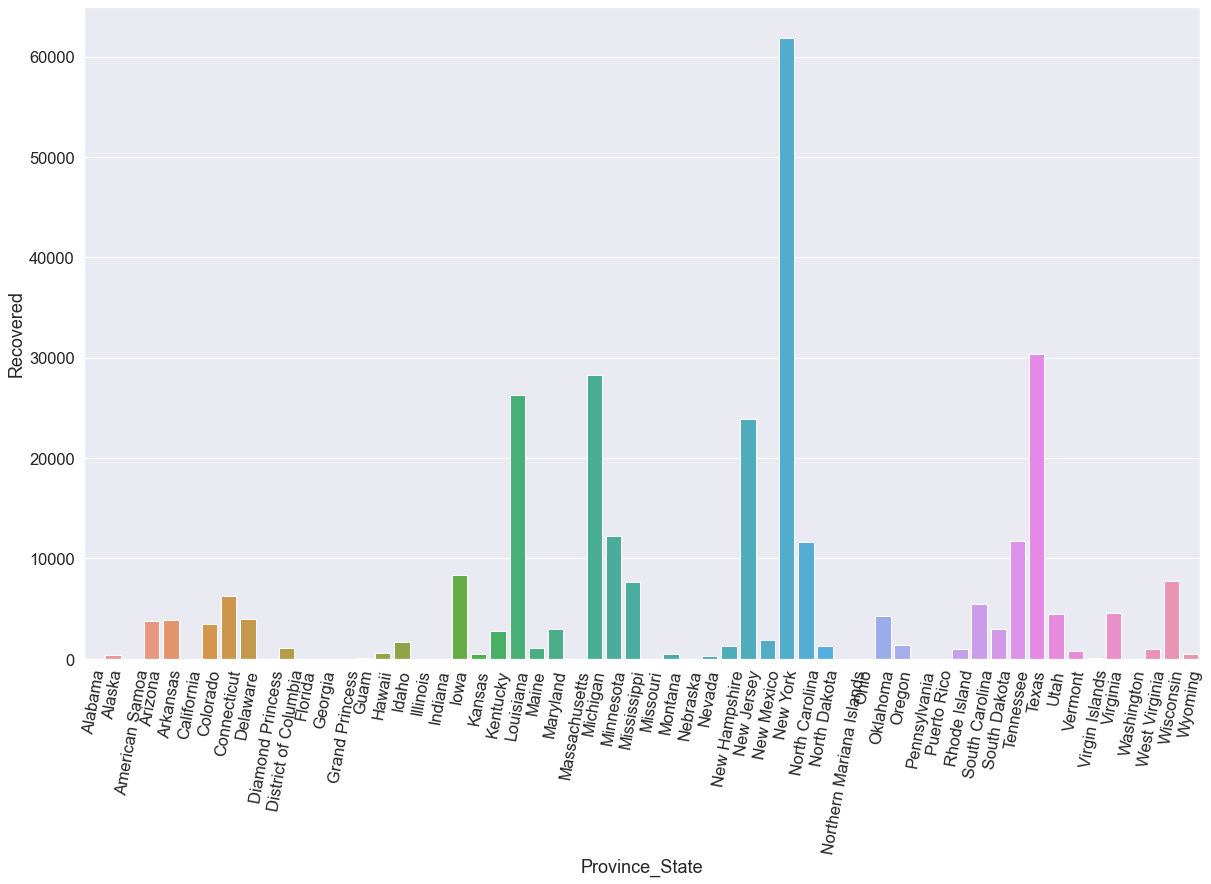

In [148]:
#Checking number Of Recovered cases state wise
plt.figure(figsize=(20,12))
sns.barplot(x="Province_State",y="Recovered",data=df1)
plt.xticks(rotation=80)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 <a list of 58 Text major ticklabel objects>)

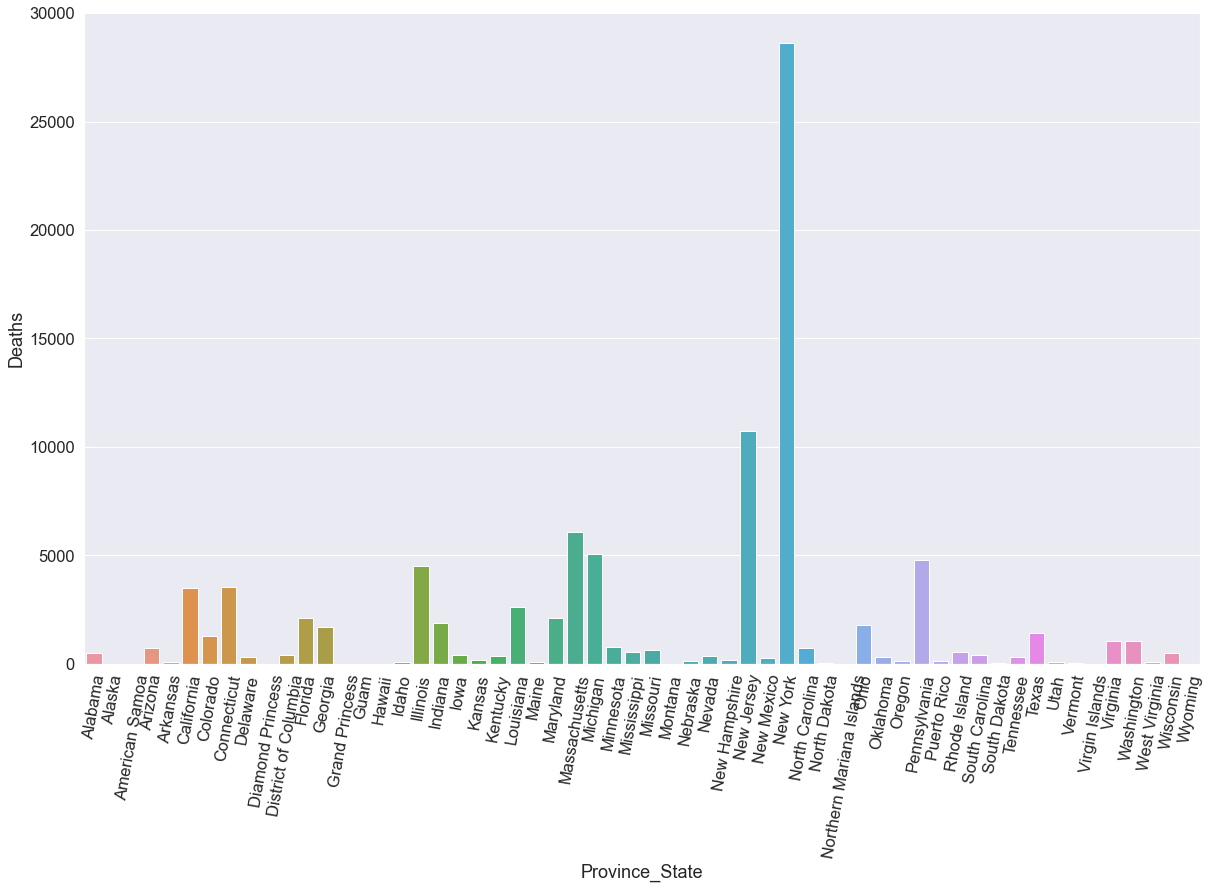

In [149]:
#Checking number Of Death cases state wise
plt.figure(figsize=(20,12))
sns.barplot(x="Province_State",y="Deaths",data=df1)
plt.xticks(rotation=80)


In [ ]:
Death cases is also high in new york state in comparison of other state.

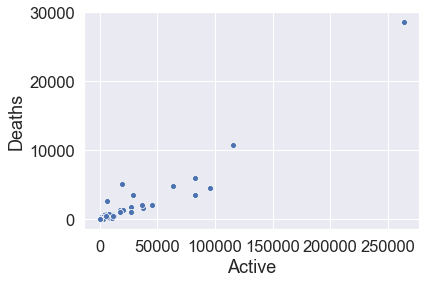

In [136]:
#Checking number Of deaths vs No of active cases
sns.scatterplot(x="Active",y="Deaths",data=df)

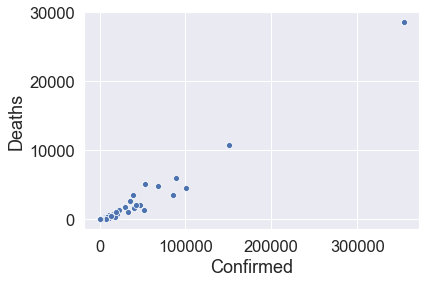

In [137]:
#Checking number Of deaths vs No of Confirmed cases
sns.scatterplot(x="Confirmed",y="Deaths",data=df)

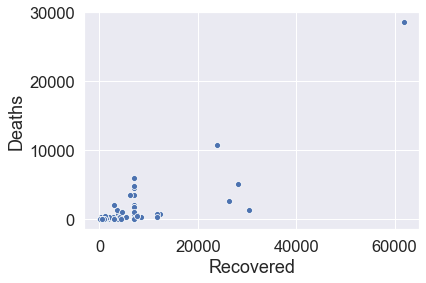

In [138]:
#Checking number Of deaths vs No of Recovered cases
sns.scatterplot(x="Recovered",y="Deaths",data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCF3211A00>,
      dtype=object)

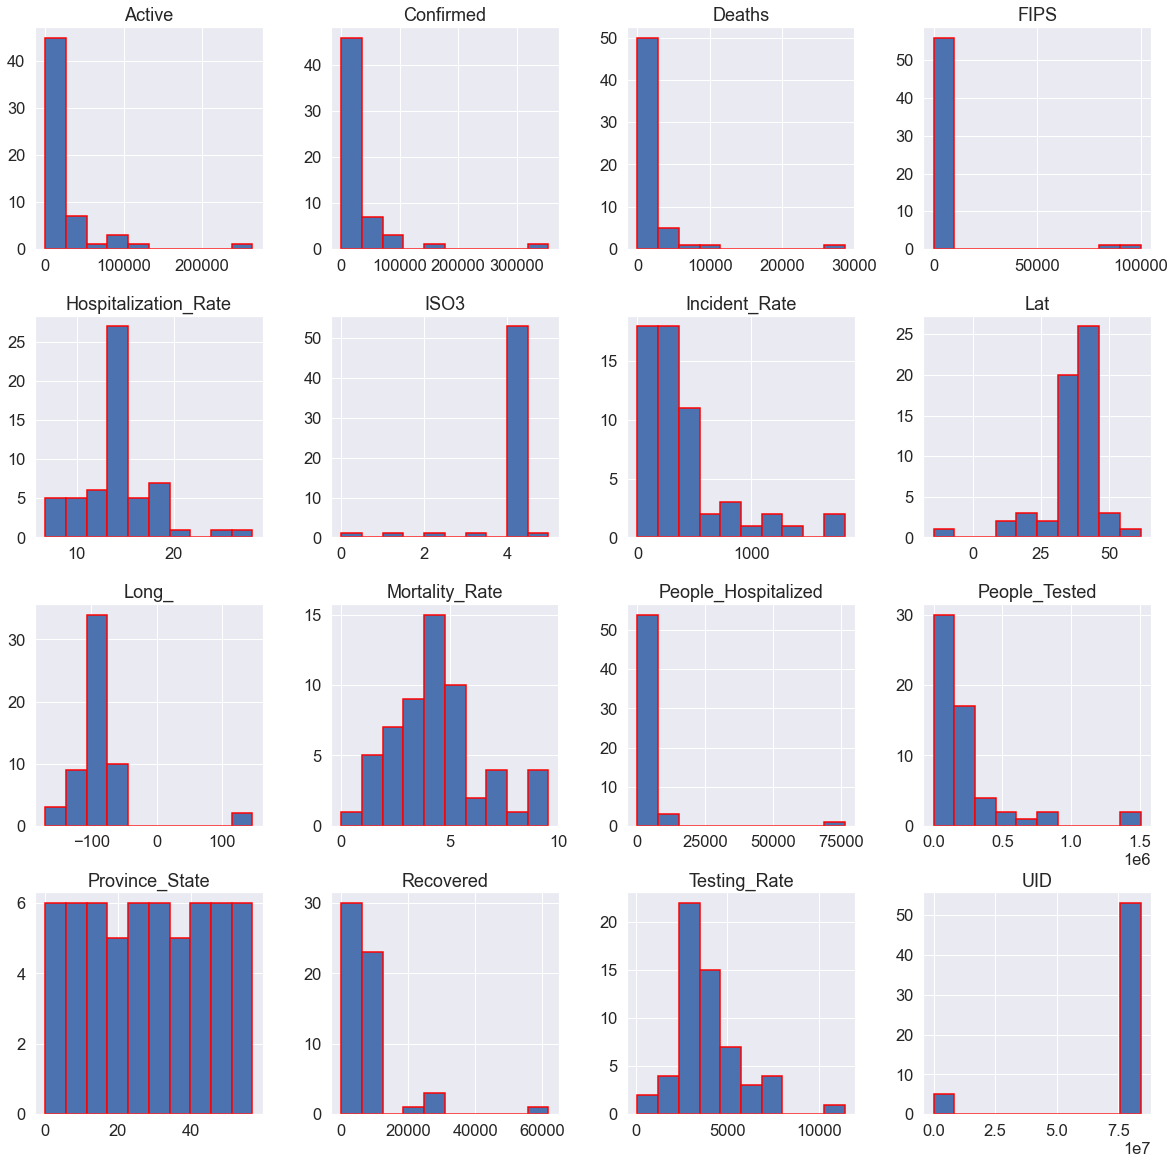

In [144]:
#Checking distribution of all columns by plotting histogram
df.hist(edgecolor="red",linewidth=1.5,figsize=(20,20))

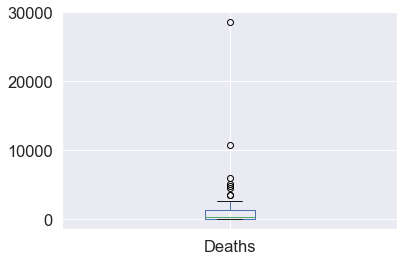

In [156]:
#Checking Outliers In Deaths
df['Deaths'].plot.box()

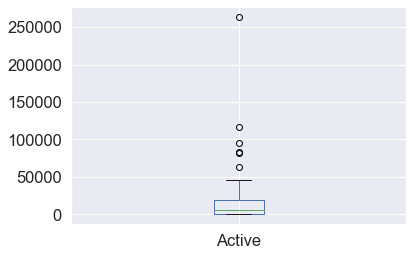

In [157]:
#Checking Outliers In Active
df['Active'].plot.box()

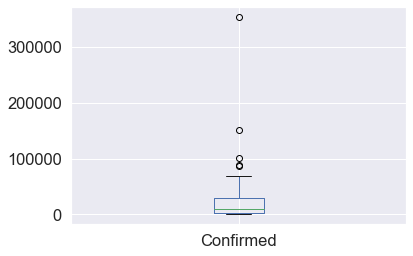

In [158]:
#Checking Outliers In Confirmed
df['Confirmed'].plot.box()

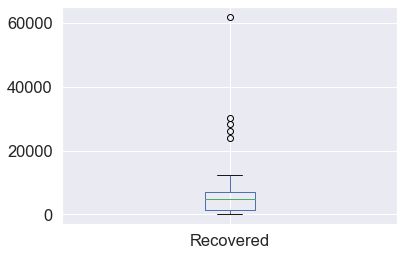

In [159]:
#Checking Outliers In Recovered
df['Recovered'].plot.box()

So we can observe  by above observation there is outliers present in the dataset. We have to remove these for better model
Building.

In [160]:
#Treating Outliers
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold =3
new_df = df[(z<3).all(axis=1)]
new_df

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,32.3182,-86.9023,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,4,3353.942386,11.438860
1,1,61.3707,-152.4044,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,4,5063.940017,14.342541
3,3,33.7298,-111.4312,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,4,2272.859351,12.022005
4,4,34.9697,-92.3731,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,4,3189.670370,10.693584
6,6,39.0598,-105.3111,22797,1299,3478.000000,18020.0,8,395.868121,131837.0,3955.000000,5.698118,84000008,4,2289.339188,17.348774
8,8,39.3185,-75.5071,8194,310,3965.000000,3919.0,10,841.476990,45412.0,4897.454545,3.783256,84000010,4,4663.552976,14.342541
10,10,38.8974,-77.0268,7551,407,1059.000000,6085.0,11,1069.927127,40419.0,4897.454545,5.390015,84000011,4,5727.106946,14.342541
11,11,27.7663,-81.6868,47471,2096,7007.428571,45375.0,12,221.024217,771348.0,8934.000000,4.415327,84000012,4,3591.383953,18.819911
12,12,33.0406,-83.6431,39801,1697,7007.428571,38104.0,13,374.864974,402940.0,7107.000000,4.263712,84000013,4,3795.082856,17.856335
15,15,21.0943,-157.4983,643,17,578.000000,48.0,15,45.413710,46304.0,82.000000,2.643857,84000015,4,3270.352122,12.752722


In [161]:
new_df.shape

(46, 16)

In [162]:
df.shape

(58, 16)

In [163]:
#Percentage Loss of data after removing outliers
percentage_loss=((12)/58)*100
percentage_loss

20.689655172413794

In [164]:
#IQR Method

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Province_State              28.500000
Lat                          7.341275
Long_                       22.625150
Confirmed                26799.500000
Deaths                    1320.250000
Recovered                 5725.678571
Active                   18478.750000
FIPS                        29.500000
Incident_Rate              307.918843
People_Tested           217215.602679
People_Hospitalized       3442.954545
Mortality_Rate               2.334750
UID                         29.500000
ISO3                         0.000000
Testing_Rate              1880.742883
Hospitalization_Rate         2.722058
dtype: float64


In [165]:
df_new1 = df[~((df<(Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]
print(df_new1.shape)

(30, 16)


So in this case we can see that there is heavy loss of data while removing outliers.I will continue without removing outliers
and check the model performance.

# Preparing dataset For Model Training

In [265]:
#Seprating independent and target variable
x= new_df.drop("Deaths",axis=1)
y= new_df["Deaths"] #Target variable

In [258]:
#Linear Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
x= pca.fit_transform(x)
x.shape

(46, 10)

In [246]:
#Checking skewness
df.skew()

Province_State          0.000000
Lat                    -2.250097
Long_                   3.567919
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
UID                    -3.027480
ISO3                   -4.126625
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

In [247]:
#Removing Skewness
from sklearn.preprocessing import power_transform
x= power_transform(x,method="yeo-johnson")

In [248]:
x.shape

(46, 10)

In [249]:
y.shape

(46,)

In [250]:
y= y.values.reshape(-1,1)
y.shape

(46, 1)

# Model Building

In [266]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_t = sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [267]:
#Finding Best Random State
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test = train_test_split(x_t,y,test_size = .25,random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempaccu = r2_score(y_test,y_pred)
    
    if tempaccu>accu:
        accu = tempaccu
        best_rstate = i
        
        
        
print(f"Best Accuracy {accu*100} found on random_state {best_rstate}")
    



Best Accuracy 96.80902707032695 found on random_state 109


In [268]:
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(x_t,y,random_state=109,test_size=0.25)

In [269]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [270]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


In [273]:
#All algorithm by using for loop
model = [LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),SVR()]

for m in model:
    m.fit(x_train_b,y_train_b)
    m.score(x_train_b,y_train_b)
    predm = m.predict(x_test_b)
    rds= r2_score(y_test_b,predm)
    print("Accuracy Score Of ",m,"is :")    
    print("R2-Score= ",rds*100)
    rdscore = cross_val_score(m,x_t,y,cv=10)
    rdc=rdscore.mean()
    print("Cross Val Score= ",rdc*100)
    print("Error:")
    print('Mean Absolute Error:= ',mean_absolute_error(y_test_b,predm))
    print('Mean Squared Error:= ',mean_squared_error(y_test_b,predm))
    print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test_b,predm)))    
    print("**************************************************************************************************************")
    print('\n')
    
    

Accuracy Score Of  LinearRegression() is :
R2-Score=  96.80902707032695
Cross Val Score=  34.48639397083081
Error:
Mean Absolute Error:=  176.01158837680282
Mean Squared Error:=  54913.90165571638
Root Mean Square Error;=  234.33715380988218
**************************************************************************************************************


Accuracy Score Of  Lasso() is :
R2-Score=  96.8641159118787
Cross Val Score=  45.193172529980856
Error:
Mean Absolute Error:=  174.72957377086246
Mean Squared Error:=  53965.870038409535
Root Mean Square Error;=  232.30555318030935
**************************************************************************************************************


Accuracy Score Of  Ridge() is :
R2-Score=  95.81570270839039
Cross Val Score=  55.865512723898206
Error:
Mean Absolute Error:=  193.14214002521086
Mean Squared Error:=  72008.16021754025
Root Mean Square Error;=  268.34336253676975
********************************************************************

In [227]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor


In [235]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [274]:
model = [RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),SGDRegressor()]

for m in model:
    m.fit(x_train_b,y_train_b)
    m.score(x_train_b,y_train_b)
    predm = m.predict(x_test_b)
    rds= r2_score(y_test_b,predm)
    print("Accuracy Score Of ",m,"is :")    
    print("R2-Score= ",rds*100)
    rdscore = cross_val_score(m,x_t,y,cv=3)
    rdc=rdscore.mean()
    print("Cross Val Score= ",rdc*100)
    print("Error:")
    print('Mean Absolute Error:= ',mean_absolute_error(y_test_b,predm))
    print('Mean Squared Error:= ',mean_squared_error(y_test_b,predm))
    print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test_b,predm)))
    print("**************************************************************************************************************")
    print('\n')
    
    

Accuracy Score Of  RandomForestRegressor() is :
R2-Score=  96.1885353602299
Cross Val Score=  75.16937869515344
Error:
Mean Absolute Error:=  168.87416666666667
Mean Squared Error:=  65592.03070833335
Root Mean Square Error;=  256.1094115965545
**************************************************************************************************************


Accuracy Score Of  AdaBoostRegressor() is :
R2-Score=  98.52769588463931
Cross Val Score=  71.56910384675747
Error:
Mean Absolute Error:=  136.10462454212455
Mean Squared Error:=  25337.088461764884
Root Mean Square Error;=  159.17628109038384
**************************************************************************************************************


Accuracy Score Of  GradientBoostingRegressor() is :
R2-Score=  98.20566947442964
Cross Val Score=  65.16776625377393
Error:
Mean Absolute Error:=  118.63794079167404
Mean Squared Error:=  30878.88621766417
Root Mean Square Error;=  175.72389199441312
**********************************

After Apply encoding method i found the best performing model is SGDRegressor with 
R2-Score=  96.25500098854614
Cross Val Score=  81.53146900449796
I will continue with this model and save but before i will use some hyperparameter tuning to see if score increase.

In [280]:
from sklearn.linear_model import SGDRegressor
parameters= {'loss':['squared_loss', 'huber', 'epsilon_insensitive'],'penalty':['l1','l2'],'max_iter':[1000,1500]}
sgr=SGDRegressor()
clf = GridSearchCV(sgr,parameters)
clf.fit(x_train_b,y_train_b)
print(clf.best_params_)


{'loss': 'squared_loss', 'max_iter': 1000, 'penalty': 'l2'}


In [293]:
sgr = SGDRegressor(loss='squared_loss',max_iter=1000,penalty='l2')
sgr.fit(x_train_b,y_train_b)
sgr.score(x_train_b,y_train_b)
predsgr = sgr.predict(x_test_b)
rds= r2_score(y_test_b,predsgr)
print("Accuracy Score Of ",m,"is :")    
print("R2-Score= ",rds*100)
rdscore = cross_val_score(m,x_t,y,cv=3)
rdc=rdscore.mean()
print("Cross Val Score= ",rdc*100)
print("Error:")
print('Mean Absolute Error:= ',mean_absolute_error(y_test_b,predsgr))
print('Mean Squared Error:= ',mean_squared_error(y_test_b,predsgr))
print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test_b,predsgr)))
print("**************************************************************************************************************")
print('\n')
    
    

Accuracy Score Of  SGDRegressor() is :
R2-Score=  96.29588165612294
Cross Val Score=  81.56181562888149
Error:
Mean Absolute Error:=  192.6648623396327
Mean Squared Error:=  63744.693214192055
Root Mean Square Error;=  252.47711423848313
**************************************************************************************************************




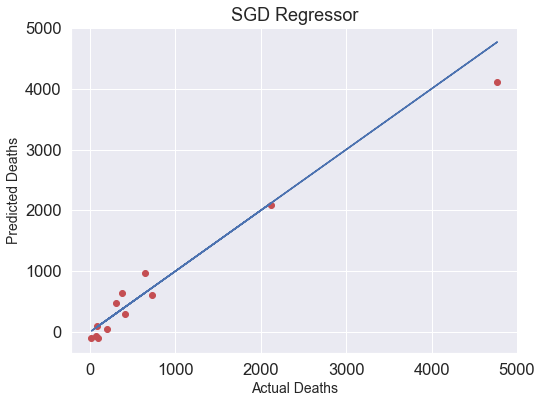

In [295]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b,y=predsgr,color='r')
plt.plot(y_test_b,y_test_b,color='b')
plt.xlabel("Actual Deaths",fontsize = 14)
plt.ylabel("Predicted Deaths",fontsize =14)
plt.title('SGD Regressor',fontsize=18)
plt.show()

# Model saving

In [297]:
#Model Saving with best model RandomForestRegressor
import joblib 

joblib.dump(sgr,'sgrfile.obj')

['sgrfile.obj']

In [298]:
#Loading to see my model
sgr_from_joblib = joblib.load('sgrfile.obj')
sgr_from_joblib

SGDRegressor()

In [302]:
x_predict=sgr_from_joblib.predict(x_test)

In [303]:
# Saving The predictions in csv file
import numpy as np
import pandas as pd
prediction = pd.DataFrame(x_predict, columns=['Predictions']).to_csv('Deaths_Prediction.csv')

# END OF PROJECT

Note:- I have not used PCA and Remove skewness method as i found that there is cross_val score was coming high -ve then r2
    score so i tried with sevral steps and found that without PCA and skewness remove it gives good score.